# Catalog of WFC3 Transmission and Emission Spectra

In this notebook we'll look at the whole catalog of transmission and emission spectra available from HST WFC3. If there are spectra missing, you could try [opening an issue](https://github.com/christinahedges/ombre/issues/new) against `ombre`.

You can see all the notebooks that make these spectra by clicking the links on the left hand side.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ombre.query import get_nexsci
from ombre import Spectrum, Spectra
from astropy.io import fits
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-white')
from glob import glob
import numpy as np

In [3]:
from astropy.constants import G, k_B, m_p
import astropy.units as u
import numpy as np
def get_eqt(period, st_mass=1, st_rad=1, st_teff=5777, A=0.3):
    M = st_mass*u.solMass
    P = period*u.day
    R = st_rad*u.solRad
    T = st_teff*u.K
    a = (((G*M/(4*np.pi**2)) * P**2)**(1/3)).to(u.solRad)
    return T * np.sqrt(R/(2*a)) * (1 - A)**0.25

In [4]:
def get_H(teq, mass, rad):
    mu = m_p * 2
    g = ((G * mass * u.solMass)
        / (rad * u.solRad) ** 2
    ).to(u.m / u.s ** 2)
    return ((k_B * teq)/(mu * g)).to(u.km)

In [5]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord

# Stellar Spectra

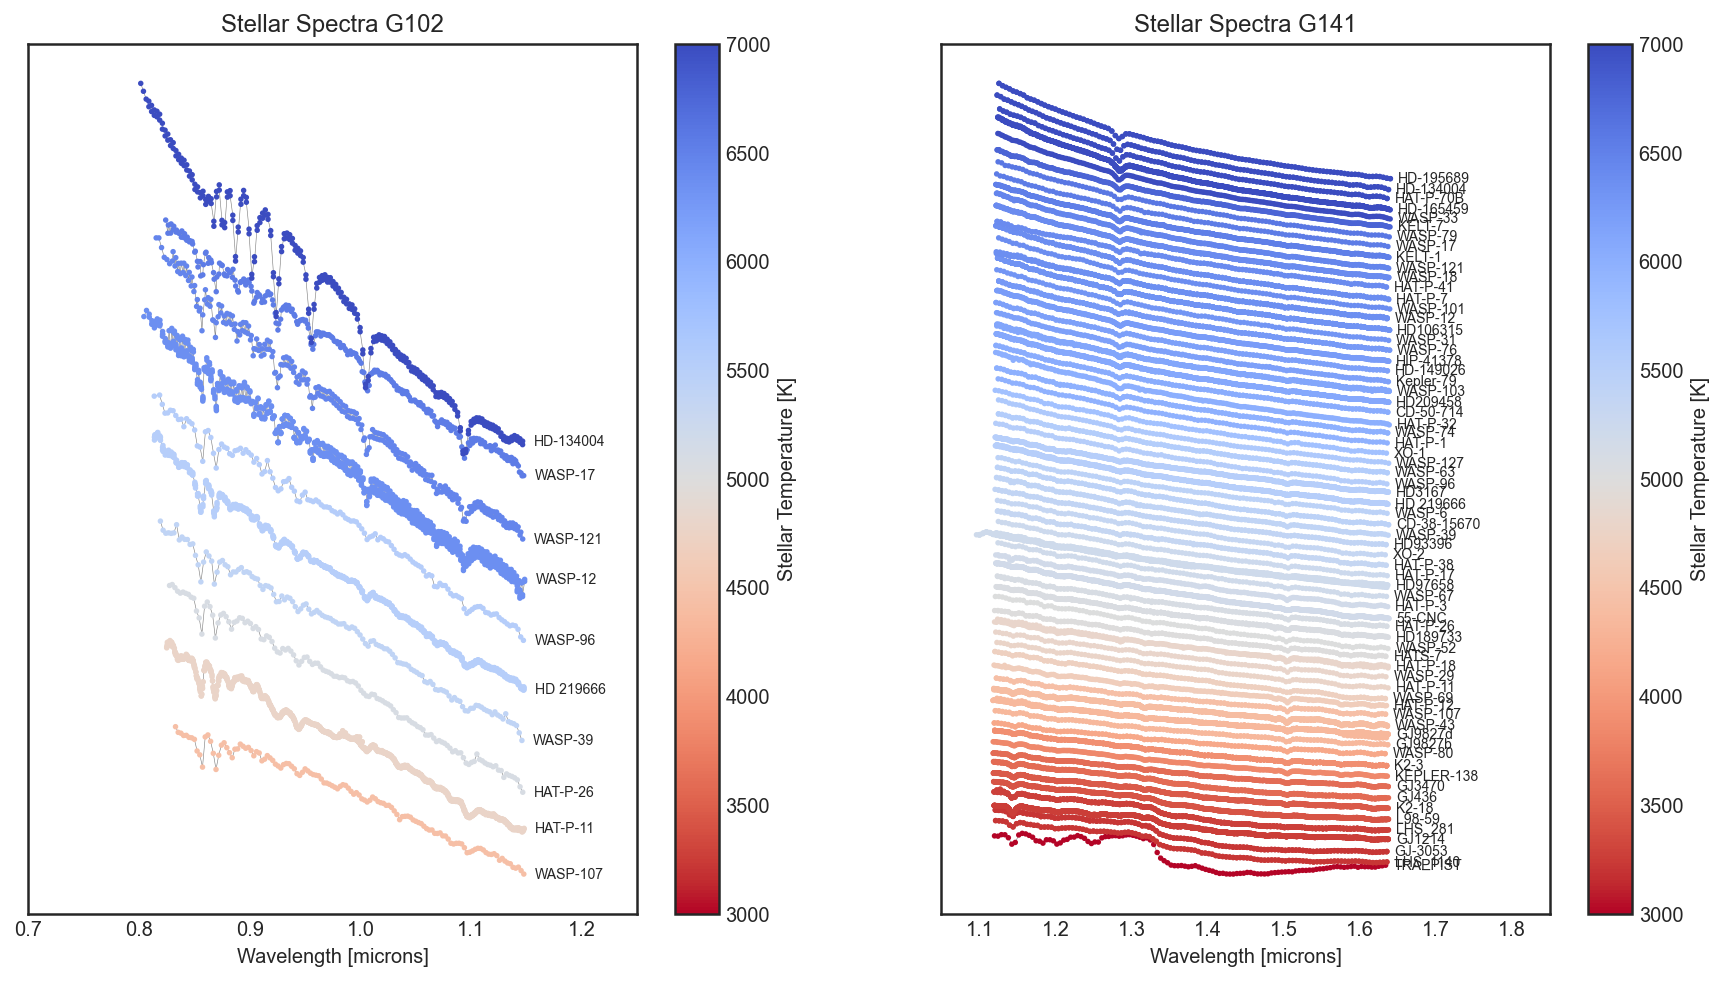

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
fnames = np.sort(np.asarray(glob('results/*_stellar_spectrum.fits')))
s = np.argsort([Spectra.from_file(fname)[0].meta['st_teff'] for fname in fnames])
for jdx, label in enumerate(['G102', 'G141']):
    ax = axs[jdx]
    kdx = 0 
    for idx, fname in enumerate(fnames[s]):
        hdu = fits.open(fname)
        name = '_'.join(fname.split('/')[1].split('_')[:-2])
        sp = Spectra.from_file(fname)
        k = np.where([v == label for v in sp.visits])[0]
        if len(k) == 0:
            continue
        sp = sp[k].flatten()
        x, y, ye = sp.wavelength.value * 1e-4, sp.spec.value +  kdx*0.15, sp.spec_err.value
        im = ax.scatter(x, y, c=np.ones_like(y) + sp.meta['st_teff'], vmin=3000, vmax=7000, cmap='coolwarm_r', s=3, zorder=1)
        ax.plot(x, y, c='grey', lw=0.3, zorder=-1)
        ax.text(x[-1] + 0.01, y[-1], name, ha='left', va='center', size=7)
        kdx += 1
        if (sp.spec.value.mean() < 0.5):
            print(fname)
    ax.set(xlabel= ('Wavelength [microns]'), yticks=[], title=f'Stellar Spectra {label}')
    if jdx == 0:
        ax.set_xlim((0.7, 1.25))
    else:
        ax.set_xlim(1.05, 1.85)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Stellar Temperature [K]')
